In [2]:
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'

In [4]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [5]:
import json
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path)]

In [6]:
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [7]:
records[0]['r']

u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf'

In [8]:
print records[0]['r']

http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf


In [9]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [10]:
time_zones[:10]

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

In [11]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [12]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts

In [13]:
counts = get_counts(time_zones)

In [14]:
counts['America/New_York']

1251

In [15]:
len(time_zones)

3440

In [17]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [20]:
top_counts(counts)

[(33, u'America/Sao_Paulo'),
 (35, u'Europe/Madrid'),
 (36, u'Pacific/Honolulu'),
 (37, u'Asia/Tokyo'),
 (74, u'Europe/London'),
 (191, u'America/Denver'),
 (382, u'America/Los_Angeles'),
 (400, u'America/Chicago'),
 (521, u''),
 (1251, u'America/New_York')]

In [22]:
from collections import Counter

In [23]:
counts = Counter(time_zones)

In [24]:
counts.most_common(10)

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

In [25]:
from pandas import DataFrame, Series

In [26]:
import pandas as pd; import numpy as np

In [27]:
frame = DataFrame(records)

In [28]:
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1331919941,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1,http://t.co/03elZC4Q,1331923250,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0,direct,1331923249,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1273672411,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923251,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1273672506,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923252,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0,http://plus.url.google.com/url?sa=z&n=13319232...,1331923255,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/,1331923255,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1331923254,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,NaN,0,http://t.co/o1Pd0WeV,1331923255,,http://apod.nasa.gov/apod/ap120312.html


In [29]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [30]:
tz_counts = frame['tz'].value_counts()

In [31]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
dtype: int64

In [32]:
clean_tz = frame['tz'].fillna('Missing')

In [33]:
clean_tz[clean_tz == ''] = 'Unknown'

In [34]:
tz_counts = clean_tz.value_counts()

In [35]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
dtype: int64

In [41]:
tz_counts[:10].plot(kind='barh', rot=0)

In [42]:
frame['a'][1]

u'GoogleMaps/RochesterNY'

In [43]:
frame['a'][50]

u'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [45]:
frame['a'][len(frame['a'])-1]

u'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; MS-RTC LM 8; .NET4.0C; .NET4.0E; .NET CLR 1.1.4322)'

In [46]:
results = Series([x.split()[0] for x in frame.a.dropna()])

In [47]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [61]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [66]:
type(frame)

pandas.core.frame.DataFrame

In [67]:
cframe = frame[frame.a.notnull()]

In [68]:
operation_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

In [69]:
operation_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='|S11')

In [71]:
by_tz_os = cframe.groupby(['tz', operation_system])

In [87]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [92]:
indexer = agg_counts.sum(1).argsort()

In [115]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [116]:
count_subset = agg_counts.take(indexer)[-10:]

In [117]:
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13,20
Europe/Madrid,16,19
Pacific/Honolulu,0,36
Asia/Tokyo,2,35
Europe/London,43,31
America/Denver,132,59
America/Los_Angeles,130,252
America/Chicago,115,285
,245,276


In [118]:
count_subset.plot(kind='barh', stacked=True)

In [119]:
%matplotlib inline

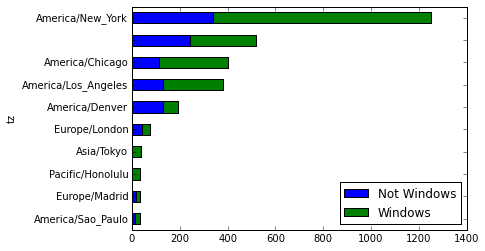

In [120]:
count_subset.plot(kind='barh', stacked=True)

In [121]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)

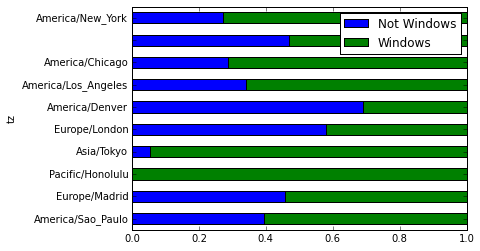

In [122]:
normed_subset.plot(kind='barh', stacked=True)

In [123]:
import pandas as pd

In [124]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']

In [126]:
users = pd.read_table('./ch02/movielens/users.dat', sep='::', header=None, names=unames, engine='python')

In [127]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']

In [128]:
ratings = pd.read_table('./ch02/movielens/ratings.dat', sep='::', header=None, names=rnames)

In [129]:
mnames = ['movie_id', 'title', 'genres']

In [130]:
movies = pd.read_table('./ch02/movielens/movies.dat', sep='::', header=None, names=mnames)

In [131]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [132]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [133]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [134]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [135]:
data = pd.merge(pd.merge(ratings, users), movies)

In [136]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [141]:
data.ix[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [146]:
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')

In [147]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [148]:
ratings_by_title = data.groupby('title').size()

In [149]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [152]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [153]:
active_titles

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)',
       u'101 Dalmatians (1961)', u'101 Dalmatians (1996)',
       u'12 Angry Men (1957)', u'13th Warrior, The (1999)',
       u'2 Days in the Valley (1996)', u'20,000 Leagues Under the Sea (1954)',
       u'2001: A Space Odyssey (1968)', u'2010 (1984)', 
       ...
       u'X-Men (2000)', u'Year of Living Dangerously (1982)',
       u'Yellow Submarine (1968)', u'You've Got Mail (1998)',
       u'Young Frankenstein (1974)', u'Young Guns (1988)',
       u'Young Guns II (1990)', u'Young Sherlock Holmes (1985)',
       u'Zero Effect (1998)', u'eXistenZ (1999)'],
      dtype='object', name=u'title', length=1216)

In [154]:
mean_ratings = mean_ratings.ix[active_titles]

In [155]:
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [156]:
top_female_ratings = mean_ratings.sort_index(by='F', ascending=False)

In [157]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [158]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [159]:
sorted_by_diff = mean_ratings.sort_index(by='diff')

In [169]:
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [170]:
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [166]:
sorted_by_diff

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [171]:
ratings_std_by_title = data.groupby('title')['rating'].std()

In [172]:
ratings_std_by_title = ratings_std_by_title.ix[active_titles]

In [173]:
ratings_std_by_title.order(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [177]:
import pandas as pd

In [178]:
names1880 = pd.read_csv('./ch02/names/yob1880.txt', names=['name', 'sex', 'birth'])

In [179]:
names1880

,name,sex,birth
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [182]:
names1880.groupby('sex').birth.sum()

sex
F     90993
M    110493
Name: birth, dtype: int64

In [183]:
years = range(1880, 2011)

In [184]:
pieces = []
columns = ['name', 'sex', 'birth']

In [186]:
for year in years:
    path = './ch02/names/yob%d.txt' %year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

In [187]:
names = pd.concat(pieces, ignore_index=True)

In [188]:
names

,name,sex,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [189]:
total_births = names.pivot_table('birth', index='year', columns='sex', aggfunc=sum)

In [190]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


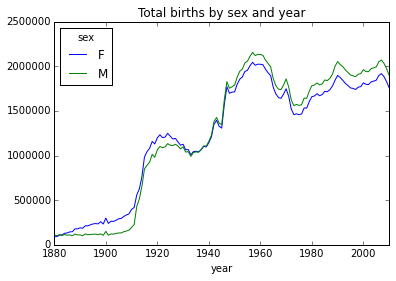

In [191]:
total_births.plot(title='Total births by sex and year')

In [193]:
def add_prop(group):
    births = group.birth.astype(float)
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [194]:
names

,name,sex,birth,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [195]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [197]:
def get_top1000(group):
    return group.sort_index(by='birth', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [198]:
top1000

name sex  birth  year      prop
year sex                                              
1880 F   0             Mary   F   7065  1880  0.077643
         1             Anna   F   2604  1880  0.028618
         2             Emma   F   2003  1880  0.022013
         3        Elizabeth   F   1939  1880  0.021309
         4           Minnie   F   1746  1880  0.019188
         5         Margaret   F   1578  1880  0.017342
         6              Ida   F   1472  1880  0.016177
         7            Alice   F   1414  1880  0.015540
         8           Bertha   F   1320  1880  0.014507
         9            Sarah   F   1288  1880  0.014155
         10           Annie   F   1258  1880  0.013825
         11           Clara   F   1226  1880  0.013474
         12            Ella   F   1156  1880  0.012704
         13        Florence   F   1063  1880  0.011682
         14            Cora   F   1045  1880  0.011484
         15          Martha   F   1040  1880  0.011429
         16           Laura   F   1012  1880  0.011122
         17          Nellie   F    995  1880  0.010935
         18           Grace   F    982  1880  0.010792
         19          Carrie   F    949  1880  0.010429
         20           Maude   F    858  1880  0.009429
         21           Mabel   F    808  1880  0.008880
         22          Bessie   F    794  1880  0.008726
         23          Jennie   F    793  1880  0.008715
         24        Gertrude   F    787  1880  0.008649
         25           Julia   F    783  1880  0.008605
         26          Hattie   F    769  1880  0.008451
         27           Edith   F    768  1880  0.008440
         28          Mattie   F    704  1880  0.007737
         29            Rose   F    700  1880  0.007693
...                     ...  ..    ...   ...       ...
2010 M   1677617       Yair   M    201  2010  0.000106
         1677616      Talan   M    201  2010  0.000106
         1677614      Keyon   M    201  2010  0.000106
         1677613       Kael   M    201  2010  0.000106
         1677618   Demarion   M    200  2010  0.000105
         1677619     Gibson   M    200  2010  0.000105
         1677620     Reagan   M    200  2010  0.000105
         1677621  Cristofer   M    199  2010  0.000105
         1677622     Daylen   M    199  2010  0.000105
         1677623     Jordon   M    199  2010  0.000105
         1677624    Dashawn   M    198  2010  0.000104
         1677625      Masen   M    198  2010  0.000104
         1677629      Rowen   M    197  2010  0.000104
         1677631     Yousef   M    197  2010  0.000104
         1677630   Thaddeus   M    197  2010  0.000104
         1677628      Kadin   M    197  2010  0.000104
         1677627     Dillan   M    197  2010  0.000104
         1677626   Clarence   M    197  2010  0.000104
         1677634      Slade   M    196  2010  0.000103
         1677632    Clinton   M    196  2010  0.000103
         1677633    Sheldon   M    196  2010  0.000103
         1677636    Keshawn   M    195  2010  0.000103
         1677637   Menachem   M    195  2010  0.000103
         1677635     Joziah   M    195  2010  0.000103
         1677638     Bailey   M    194  2010  0.000102
         1677639     Camilo   M    194  2010  0.000102
         1677640     Destin   M    194  2010  0.000102
         1677641     Jaquan   M    194  2010  0.000102
         1677642     Jaydan   M    194  2010  0.000102
         1677645     Maxton   M    193  2010  0.000102

[261877 rows x 5 columns]

In [199]:
boys = top1000[top1000.sex == 'M']

In [200]:
girls = top1000[top1000.sex == 'F']

In [206]:
total_births = top1000.pivot_table('birth', index='year', columns='name', aggfunc=sum)

In [207]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102,NaN,NaN,NaN,NaN,NaN,71,...,8,23,NaN,NaN,7,NaN,8,28,27,NaN
1881,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,81,...,NaN,22,NaN,NaN,10,NaN,9,21,27,NaN
1882,NaN,NaN,NaN,85,NaN,NaN,NaN,NaN,NaN,80,...,8,25,NaN,NaN,9,NaN,17,32,21,NaN
1883,NaN,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,79,...,NaN,23,NaN,NaN,10,NaN,11,35,25,NaN
1884,NaN,NaN,NaN,97,NaN,NaN,NaN,NaN,NaN,98,...,13,31,NaN,NaN,14,6,8,58,27,NaN
1885,NaN,NaN,NaN,88,NaN,6,NaN,NaN,NaN,88,...,6,27,NaN,NaN,12,6,14,48,38,NaN
1886,NaN,NaN,NaN,86,NaN,NaN,NaN,NaN,NaN,84,...,13,25,NaN,NaN,8,NaN,20,52,43,NaN
1887,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,NaN,104,...,9,34,NaN,NaN,23,NaN,28,46,33,NaN
1888,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,137,...,11,42,NaN,NaN,23,7,30,42,45,NaN


In [208]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b520ee310>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f3b30469350>], dtype=object)

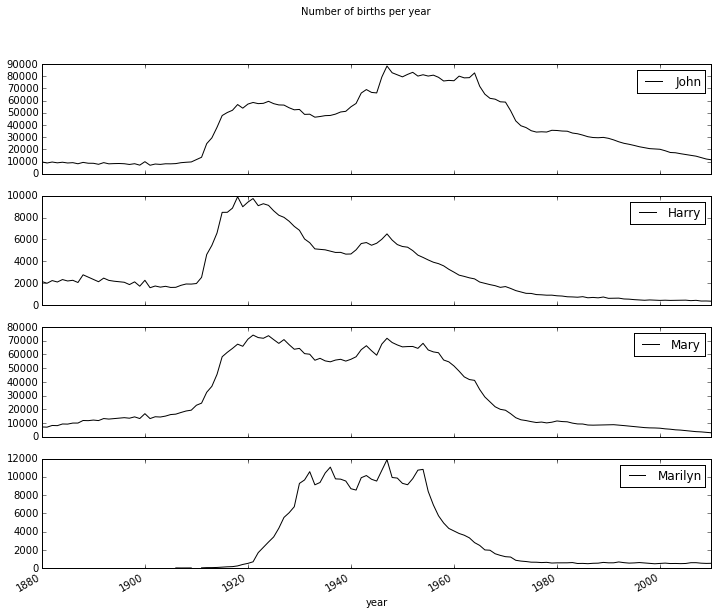

In [209]:
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

In [210]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

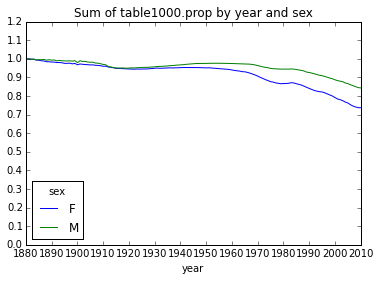

In [211]:
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [212]:
df = boys[boys.year == 2010]

In [213]:
df

name sex  birth  year      prop
year sex                                                
2010 M   1676644        Jacob   M  21875  2010  0.011523
         1676645        Ethan   M  17866  2010  0.009411
         1676646      Michael   M  17133  2010  0.009025
         1676647       Jayden   M  17030  2010  0.008971
         1676648      William   M  16870  2010  0.008887
         1676649    Alexander   M  16634  2010  0.008762
         1676650         Noah   M  16281  2010  0.008576
         1676651       Daniel   M  15679  2010  0.008259
         1676652        Aiden   M  15403  2010  0.008114
         1676653      Anthony   M  15364  2010  0.008093
         1676654       Joshua   M  15238  2010  0.008027
         1676655        Mason   M  14728  2010  0.007758
         1676656  Christopher   M  14135  2010  0.007446
         1676657       Andrew   M  14093  2010  0.007424
         1676658        David   M  14042  2010  0.007397
         1676659      Matthew   M  13954  2010  0.007350
         1676660        Logan   M  13943  2010  0.007345
         1676661       Elijah   M  13735  2010  0.007235
         1676662        James   M  13714  2010  0.007224
         1676663       Joseph   M  13657  2010  0.007194
         1676664      Gabriel   M  12722  2010  0.006701
         1676665     Benjamin   M  12280  2010  0.006469
         1676666         Ryan   M  11886  2010  0.006261
         1676667       Samuel   M  11776  2010  0.006203
         1676668      Jackson   M  11693  2010  0.006159
         1676669         John   M  11424  2010  0.006018
         1676670       Nathan   M  11269  2010  0.005936
         1676671     Jonathan   M  11028  2010  0.005809
         1676672    Christian   M  10965  2010  0.005776
         1676673         Liam   M  10852  2010  0.005716
...                       ...  ..    ...   ...       ...
         1677617         Yair   M    201  2010  0.000106
         1677616        Talan   M    201  2010  0.000106
         1677614        Keyon   M    201  2010  0.000106
         1677613         Kael   M    201  2010  0.000106
         1677618     Demarion   M    200  2010  0.000105
         1677619       Gibson   M    200  2010  0.000105
         1677620       Reagan   M    200  2010  0.000105
         1677621    Cristofer   M    199  2010  0.000105
         1677622       Daylen   M    199  2010  0.000105
         1677623       Jordon   M    199  2010  0.000105
         1677624      Dashawn   M    198  2010  0.000104
         1677625        Masen   M    198  2010  0.000104
         1677629        Rowen   M    197  2010  0.000104
         1677631       Yousef   M    197  2010  0.000104
         1677630     Thaddeus   M    197  2010  0.000104
         1677628        Kadin   M    197  2010  0.000104
         1677627       Dillan   M    197  2010  0.000104
         1677626     Clarence   M    197  2010  0.000104
         1677634        Slade   M    196  2010  0.000103
         1677632      Clinton   M    196  2010  0.000103
         1677633      Sheldon   M    196  2010  0.000103
         1677636      Keshawn   M    195  2010  0.000103
         1677637     Menachem   M    195  2010  0.000103
         1677635       Joziah   M    195  2010  0.000103
         1677638       Bailey   M    194  2010  0.000102
         1677639       Camilo   M    194  2010  0.000102
         1677640       Destin   M    194  2010  0.000102
         1677641       Jaquan   M    194  2010  0.000102
         1677642       Jaydan   M    194  2010  0.000102
         1677645       Maxton   M    193  2010  0.000102

[1000 rows x 5 columns]

In [214]:
prop_cumsum = df.sort_index(by='prop', ascending=False).prop.cumsum()

In [215]:
prop_cumsum

year  sex         
2010  M    1676644    0.011523
           1676645    0.020934
           1676646    0.029959
           1676647    0.038930
           1676648    0.047817
           1676649    0.056579
           1676650    0.065155
           1676651    0.073414
           1676652    0.081528
           1676653    0.089621
           1676654    0.097648
           1676655    0.105406
           1676656    0.112852
           1676657    0.120276
           1676658    0.127672
           1676659    0.135023
           1676660    0.142368
           1676661    0.149603
           1676662    0.156827
           1676663    0.164021
           1676664    0.170722
           1676665    0.177191
           1676666    0.183452
           1676667    0.189655
           1676668    0.195815
           1676669    0.201832
           1676670    0.207769
           1676671    0.213578
           1676672    0.219354
           1676673    0.225070
                        ...   
           1677613  

In [216]:
prop_cumsum.searchsorted(0.5)

array([116])

In [223]:
df = boys[boys.year == 1900]

In [224]:
in1900 = df.sort_index(by='prop', ascending=False).prop.cumsum()

In [225]:
in1900.searchsorted(0.5) + 1

array([25])

In [226]:
def get_quantile_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

In [227]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [242]:
diversity.head()

sex,F,M
year,,
1880,[38],[14]
1881,[38],[14]
1882,[38],[15]
1883,[39],[15]
1884,[39],[16]


In [244]:
get_last_letter = lambda x: x[-1]

In [246]:
last_letters = names.name.map(get_last_letter)

In [247]:
last_letters.name = 'last_letter'

In [248]:
table = names.pivot_table('birth', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

In [249]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [250]:
subtable.head()

sex               F                      M                
year           1910    1960    2010   1910    1960    2010
last_letter                                               
a            108376  691247  670605    977    5204   28438
b               NaN     694     450    411    3912   38859
c                 5      49     946    482   15476   23125
d              6750    3729    2607  22111  262112   44398
e            133569  435013  313833  28655  178823  129012

In [252]:
subtable.sum()

sex  year
F    1910     396416
     1960    2022062
     2010    1759010
M    1910     194198
     1960    2132588
     2010    1898382
dtype: float64

In [253]:
letter_prop = subtable / subtable.sum().astype(float)

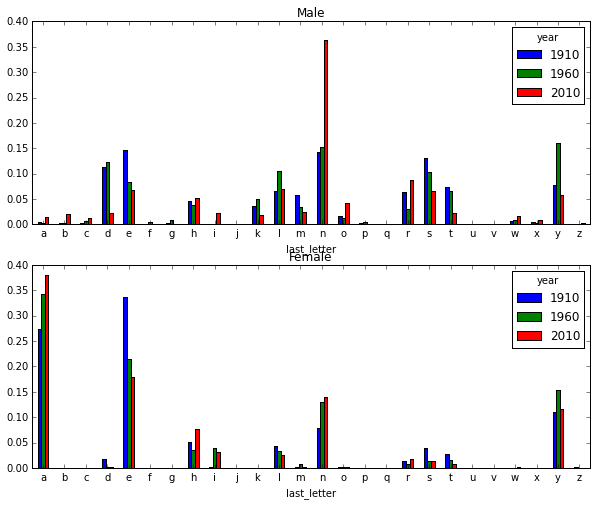

In [263]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female')

In [264]:
letter_prop = table / table.sum().astype(float)

In [265]:
dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T

In [266]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


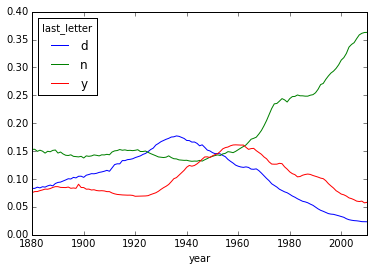

In [267]:
dny_ts.plot()

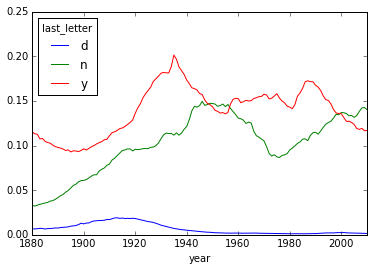

In [268]:
letter_prop.ix[['d', 'n', 'y'], 'F'].T.plot()

In [311]:
all_names = top1000.name.unique()

In [312]:
mask = np.array(['level' in x.lower() for x in all_names])

In [313]:
lesley_like = all_names[mask]

In [324]:
lesley_like = np.array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [325]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [326]:
filtered.groupby('name').birth.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: birth, dtype: int64

In [347]:
table = filtered.pivot_table('birth', index='year', columns='sex', aggfunc=sum)

In [348]:
table = table.div(table.sum(1), axis=0)

In [349]:
table.tail()

sex,F,M
year,,
2006,1,NaN
2007,1,NaN
2008,1,NaN
2009,1,NaN
2010,1,NaN


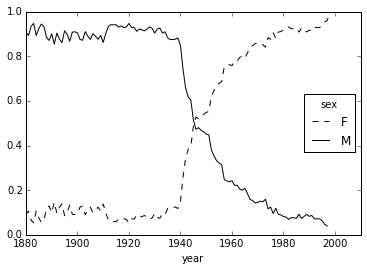

In [353]:
table.plot(style={'M': 'k-', 'F':'k--'})